In [7]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [8]:
iterations = 2000
total_number = np.arange(30, 1500, 40)
gamma = 0.95
var = 1

In [9]:
def interval_xi(gamma: float, var: float, num: int):
    X = np.square(np.random.normal(0, var, num))
    sum_squared = np.sum(X)
    left  = sum_squared / scipy.stats.chi2.ppf((1 + gamma) / 2, num)
    right = sum_squared / scipy.stats.chi2.ppf((1 - gamma) / 2, num)
    return right - left

def interval_normal(gamma: float, var: float, num: int):
    X = np.random.normal(0, var, num)
    mean_squared = np.mean(X) ** 2
    left  = num * mean_squared / (scipy.stats.norm.ppf((3 + gamma) / 4) ** 2)
    right = num * mean_squared / (scipy.stats.norm.ppf((3 - gamma) / 4) ** 2)
    return right - left

In [10]:
def calculate(func, gamma: float, var: float, num: int):
    result = []
    for _ in range(iterations):
        result.append(func(gamma, var, num))
    return np.mean(np.array(result))

In [11]:
def create_plot(func, gamma: float, var: float, total_number: int):
    data = []
    for num in total_number:
        data.append(calculate(func, gamma, var, num))
    plt.plot(total_number, data)
    plt.title(f'var = {var}, gamma = {gamma}')
    plt.xlabel("Number of samples")
    plt.ylabel("Length of interval")
    plt.show()

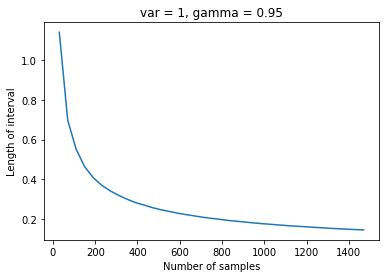

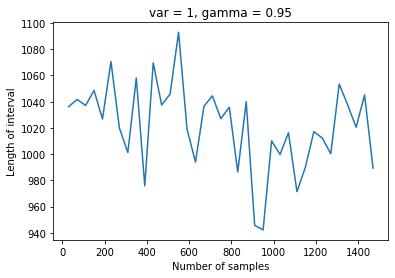

In [12]:
create_plot(interval_xi, gamma, var, total_number)
create_plot(interval_normal, gamma, var, total_number)

При распеделении хи-квадрат длина интервала убывает при увеличении объема выборки.
При нормальном распределении длина остается примерно одинаковой. В первом случае мы получим лучшую оценку, поскольку во втором случае длина интервала большая.